In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data .head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,NaN,NaN,NaN,NaN,NaN
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,NaN,NaN,NaN,NaN,10002.0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,NaN,NaN,NaN,NaN,NaN
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,NaN,NaN,NaN,NaN,NaN
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [4]:
data.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'],inplace=True,axis=1)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [6]:
data.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().any()

True

In [8]:
data.duplicated().sum()

2

In [9]:
data=data.drop_duplicates()

In [10]:
data.duplicated().any()

False

In [11]:
data.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
data.shape

(10000, 11)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Gender           10000 non-null  object 
 3   Age              9999 non-null   float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        9999 non-null   float64
 8   IsActiveMember   9999 non-null   float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.5+ KB


In [14]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [15]:
num_col=[feature for feature in data.columns if data[feature].dtype != 'object']
cat_col=[feature for feature in data.columns if data[feature].dtype == 'object']

In [16]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [17]:
cat_col

['Geography', 'Gender']

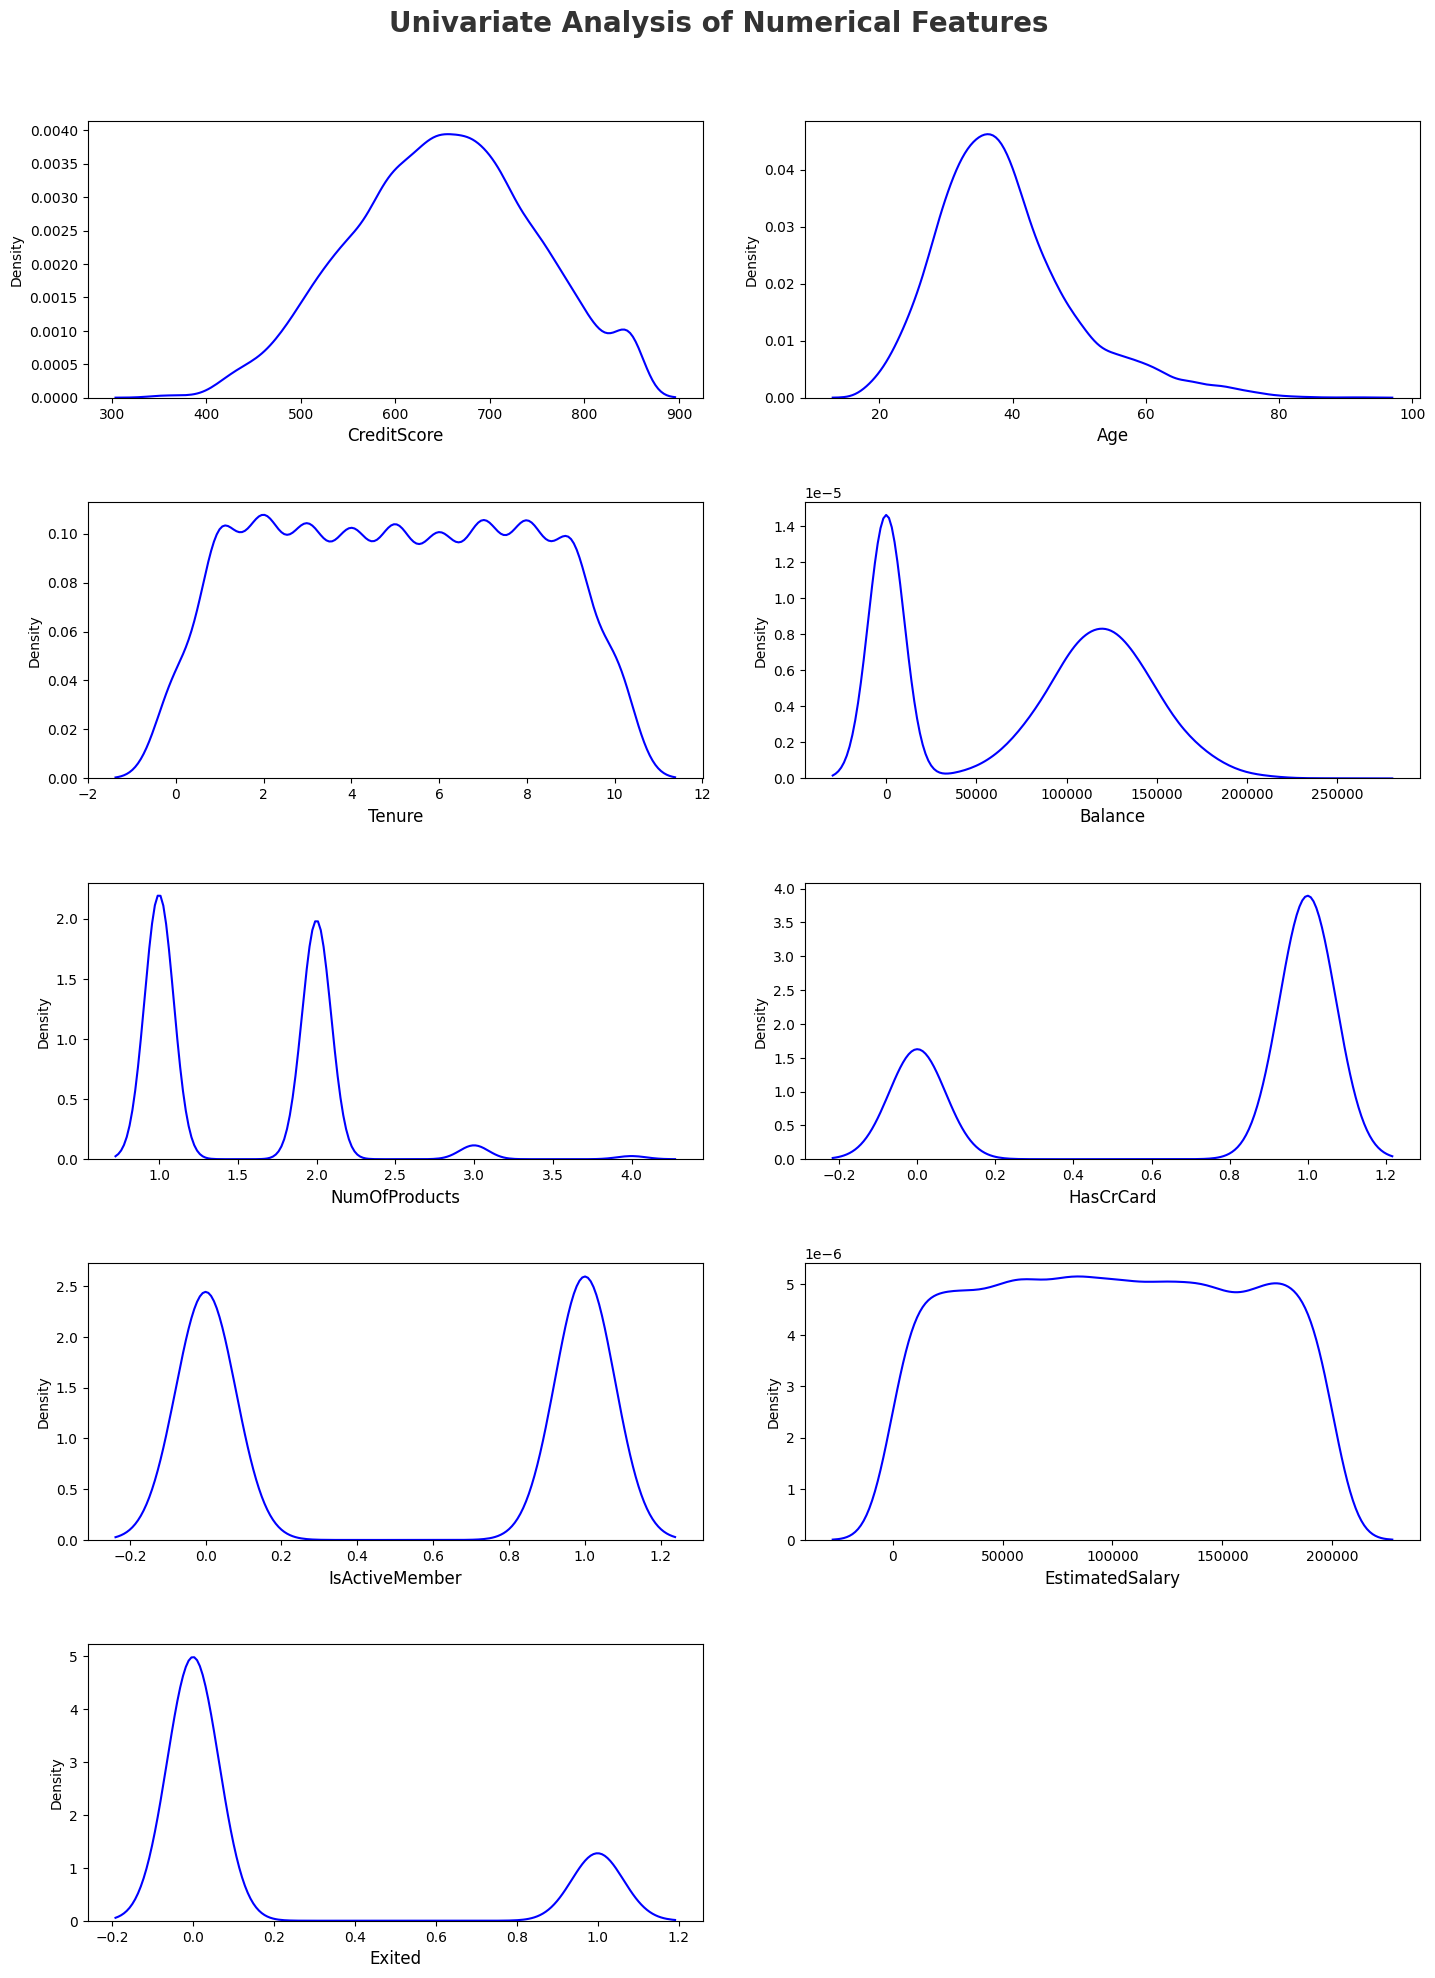

In [27]:
plt.figure(figsize=(15, 20))  # Bigger figure size for clarity
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 2, i+1)  # Smaller grid to make the plots clearer
    sns.kdeplot(x=data[num_col[i]], color='blue')
    plt.xlabel(num_col[i], fontsize=12)  # Larger font for labels

plt.tight_layout(pad=3.0)  # Add padding to avoid overlap


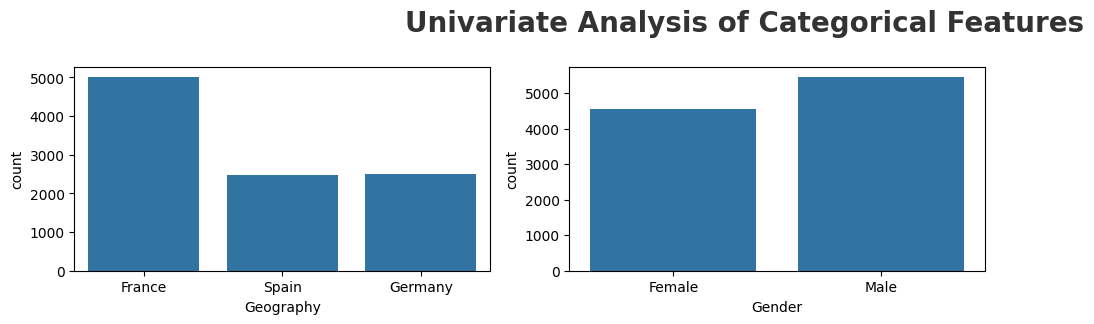

In [28]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_col)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=data[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.tight_layout()

In [29]:
discrete_features=[feature for feature in num_col if len(data[feature].unique())<=25]

continuous_features=[feature for feature in num_col if len(data[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 5 discrete features : ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

We have 4 continuous_features : ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [32]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_col:
    if chi2_contingency(pd.crosstab(data['Exited'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Geography,Reject Null Hypothesis
1,Gender,Reject Null Hypothesis


C:\Users\HP\AppData\Local\Temp\ipykernel_9180\3751688299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Exited', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\HP\AppData\Local\Temp\ipykernel_9180\3751688299.py:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=data, x='Exited', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\HP\AppData\Local\Temp\ipykernel_9180\3751688299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Exited', y=col,  palette=clr1, ax=ax[i,0])


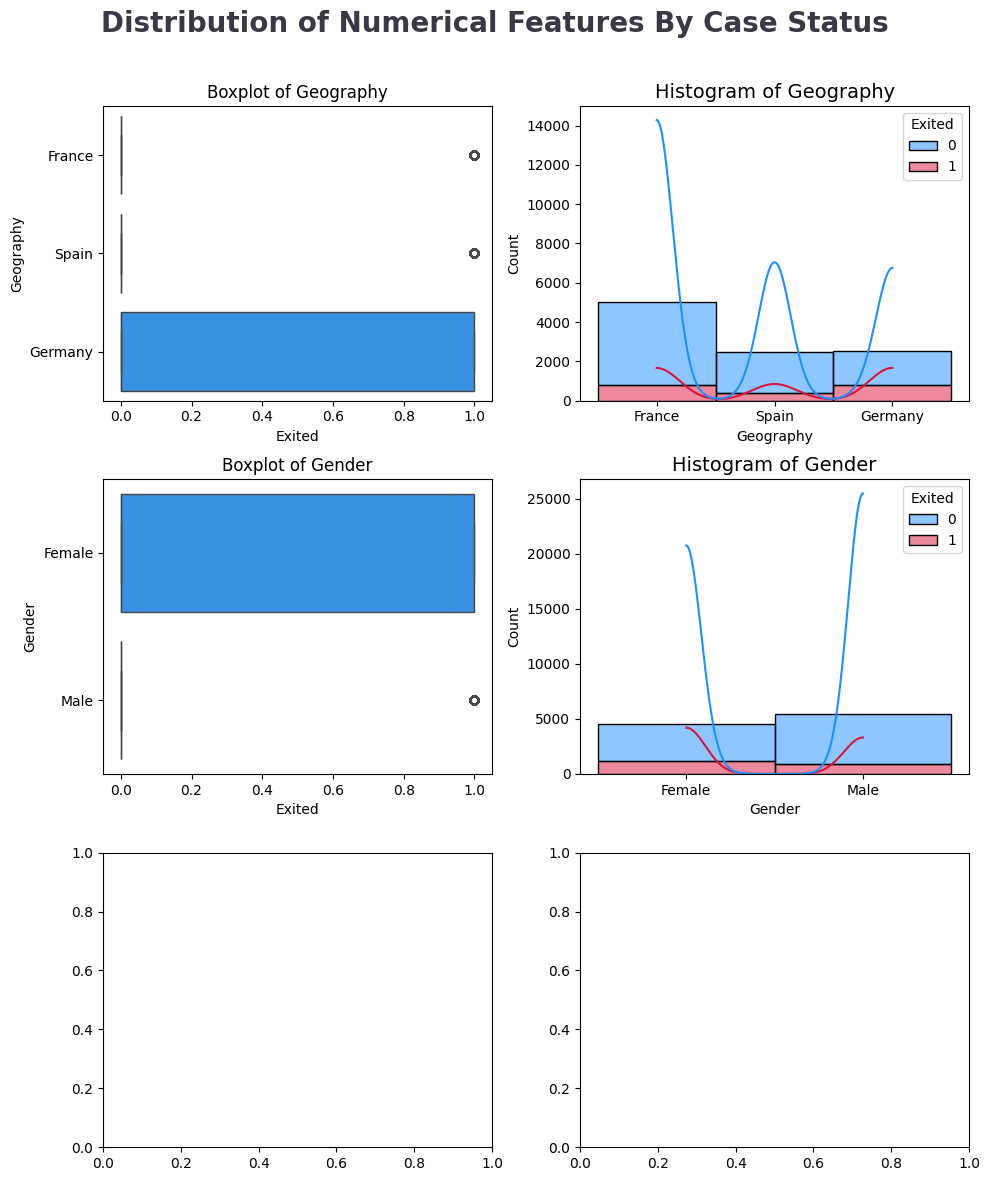

In [34]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(cat_col):   
    sns.boxplot(data=data, x='Exited', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=data, x=col, hue='Exited', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

In [36]:
X=data.drop(columns='Exited',axis=1)
y=data['Exited']

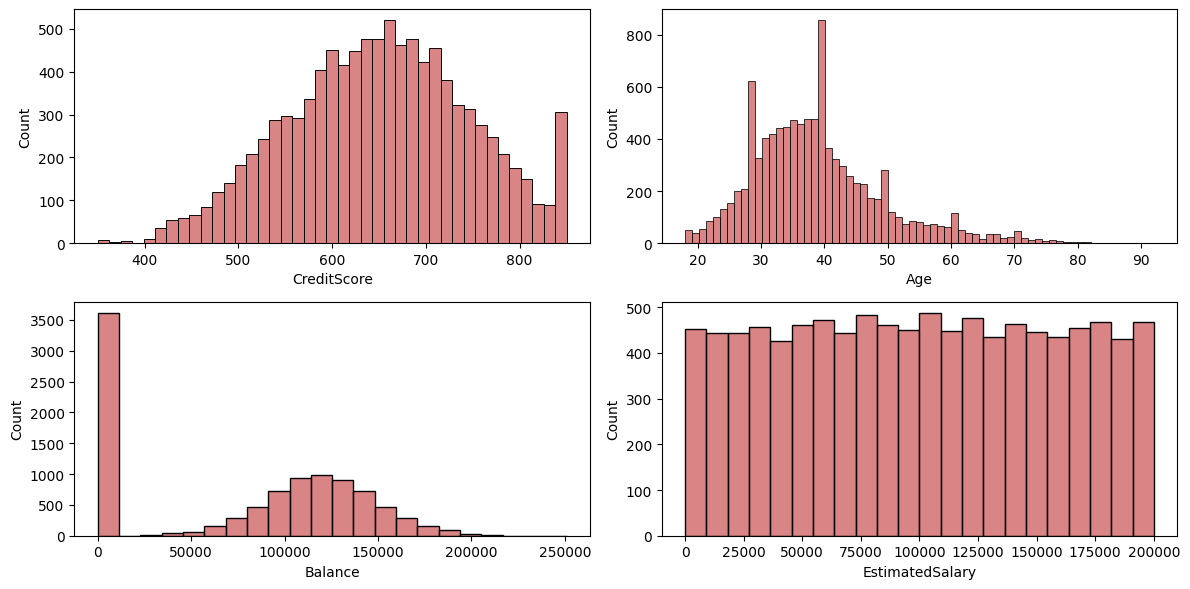

In [37]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [38]:
X[continuous_features].skew(axis=0, skipna=True)

CreditScore       -0.071607
Age                1.011255
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [41]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = continuous_features
X_copy = pt.fit_transform(X[transform_features])

In [42]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

In [43]:
X_copy.skew(axis=0, skipna=True)

CreditScore       -0.025403
Age               -0.002503
Balance           -0.555956
EstimatedSalary   -0.290537
dtype: float64

In [45]:
cat_col

['Geography', 'Gender']

In [46]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [47]:
num_columns=['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [48]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
]
)

cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('one',OneHotEncoder())
])


preprocess=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_columns),
    ('cat_pipeline',cat_pipeline,cat_col)
])




In [49]:
X = preprocess.fit_transform(X)

In [50]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [51]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [52]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9748, 13), (2438, 13))

In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 


In [54]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [55]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [56]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [57]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9569
- F1 score: 0.9612
- Precision: 0.9609
- Recall: 0.9616
- Roc Auc Score: 0.9564


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9237
- F1 score: 0.9314
- Precision: 0.9300
- Recall: 0.9328
- Roc Auc Score: 0.9226


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9305
- F1 score: 0.9388
- Precision: 0.9369
- Recall: 0.9408
- Roc Auc Score: 0.9290
----------------------------------
Model performance for Test set
- Accuracy: 0.9217
- F1 score: 0.9297
- Precision: 0.9273
- Recall: 0.9321
- Roc Auc Score: 0.9204


Logistic Regression
Model performance for Training 

c:\Users\HP\.conda\envs\churm_ml\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8987
- F1 score: 0.9104
- Precision: 0.9122
- Recall: 0.9087
- Roc Auc Score: 0.8972
----------------------------------
Model performance for Test set
- Accuracy: 0.8925
- F1 score: 0.9040
- Precision: 0.8974
- Recall: 0.9106
- Roc Auc Score: 0.8903




In [58]:
base_model_report

,Model Name,Accuracy
4,K-Neighbors Classifier,0.959393
0,Random Forest,0.956932
1,Decision Tree,0.923708
2,Gradient Boosting,0.921657
5,Support Vector Classifier,0.908121
6,AdaBoost Classifier,0.892535
3,Logistic Regression,0.788761


In [59]:
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [60]:
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

c:\Users\HP\.conda\envs\churm_ml\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\Users\HP\.conda\envs\churm_ml\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [62]:
model_param

{'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [63]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9590
- F1 score: 0.9631
- Precision: 0.9617
- Recall: 0.9645
- Roc Auc Score: 0.9583


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9832
- F1 score: 0.9850
- Precision: 0.9754
- Recall: 0.9948
- Roc Auc Score: 0.9817




In [64]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.983183
0,Random Forest Classifier,0.958983


In [65]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9832
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1084
           1       0.98      0.99      0.99      1354

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



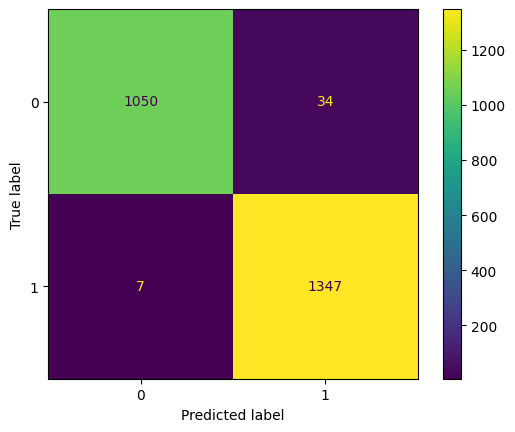

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)